# Hand-on Lab 1 Ex : Car Model Classification with CNN
In this handon Lab we are going to develop a Vehicle Classification using Computer Vision Machine Learning

Python will the programming language used

Tensorflow and Keras will the python modules use to develop the Machine Learning

We will develop the followinf section of the codes





1.   Install the python modules   
2.   Add the libraries needed for the program
3.  Prepare the data
4.   Prepare the CNN model
5.  Train the model with the training set and evaluate it performance
6.   Use the trained model to classify input data



# 1. Install Python Modules
Use the pip(python install program) to install the following modules
* !pip install tensorflow==1.15.0
* !pip install keras==2.1.6

# 2. Add the libraries needed for the program
From the installed modules add the libraries for the machine learning


```
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import optimizers, regularizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.applications.inception_v3 import preprocess_input, decode_predictions
import keras
import tensorflow as tf
```



In [5]:
#Add Code


In [6]:
print(tf.__version__)

1.13.1


# 3. Prepare the data
Following steps will prepare the data into training set and evaluation set

### 3.1 Create dir in drive and specific the path


```
In the path ./dataset/lab1dataset/data/
create a train directory with following subdir
train 
   |- Honda
   |- Toyota
   |- Volkswagen 
copy 60 different jpg imagea according to the category in each of the subdir

train data path 
train_data_dir = data_dir_path+'train'
```

```
In the path ./dataset/lab1dataset/data/
create a train directory with following subdir
test 
   |- Honda
   |- Toyota
   |- Volkswagen 
copy 60 different jpg imagea according to the category in each of the subdir

Validation data path 
validation_data_dir = data_dir_path+'validation'
```



```
In the path ./dataset/lab1dataset/
creat a dir prediction_images
Copy some test images inside this directory
prediction_data_dir = './dataset/Lab1dataset/prediction_images/'
```





In [7]:
# Define Paths 
#Add code

### 3.2 Get the total number of predicted classes
From the train subdir we can get the number of classes


> The numbers of classes are categories of object we wanted to predict

> The numbers of subdir will be the classes name

```
classes = ImageDataGenerator().flow_from_directory(train_data_dir).class_indices
print(classes)
print(len(classes))
num_classes= len(classes)
```


In [8]:
# Gets the total no. of classes
#Add code

Found 193 images belonging to 3 classes.
{'Honda': 0, 'Toyota': 1, 'Volkswagen': 2}
3


### 3.3 Prepare Data for training and validation

> Define the image width and height to be used as input to the model for training

>Define the batch size 

```

def PrepareData(img_width,img_height,batch_size ):

    # This augments the data. This is usefull when working with a small sample size
    train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

    validation_datagen = ImageDataGenerator(rescale=1. / 255)

    print("train generator")
    train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True
    )

    print("validation generator")
    validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

    return train_generator,validation_generator
```


In [9]:
#Prepare Data for training and validation

def PrepareData(img_width,img_height,batch_size ):

    # This augments the data. This is usefull when working with a small sample size
    # Add code train_datagen 

    #Add code validation_datagen

    print("train generator")
    #Add code train_generator
    
    print("validation generator")
    #Add code validation_generator
    
    return train_generator,validation_generator

# 4. Prepare the CNN Model

### 4.1 CNN Convolution Netural Network
> Use the ResNet50 CNN model

> Each typical CNN layer comprise of Conv + Activation function + MaxPooling

> Each CNN2D layer can be added into the Keras Squential 

> Define the parameters for each of the CNN layer

*   Conv2D-> number of feature map , size of feature map size NxN
*   Activation function -> relu , sigmo
*   MaxPooling-> kernel size NxN

>Define the ouput layer

*   Flatten-> 2D to 1D
*   Dense layer->number of neutrons
*   Activation Function->softmax(probability of each the classes)

```
def compileModel(img_width, img_height,learning_rate=1e-4):
    print("compiling model")

    # Insureing that the images are in the correct format.
    if K.image_data_format() == 'channels_first':
        input_shape = (3, img_width, img_height)
    else:
        input_shape = (img_width, img_height, 3)
    
    img_color=3

    conv_base = ResNet50(weights='imagenet',
                      include_top=False,
                      input_shape=(img_width, img_height, img_color))

    model = models.Sequential()
    model.add(conv_base)
    #Add dense and classification layer
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(num_classes, activation='softmax'))

    # print(model.summary())
    # print(conv_base.summary())
    model.compile(loss='categorical_crossentropy',optimizer= optimizers.adam(lr=learning_rate),metrics=['accuracy'])
    for layer in conv_base.layers:
      layer.trainable = False
    for layer in conv_base.layers[-4:]:
      layer.trainable = True
    return model

```



In [22]:
def compileModel(img_width, img_height,learning_rate=1e-4):
    print("compiling model")

    # Insureing that the images are in the correct format.
    if K.image_data_format() == 'channels_first':
        input_shape = (3, img_width, img_height)
    else:
        input_shape = (img_width, img_height, 3)
    
    img_color=3

    #Add code use the ResNet50 model
    

    # print(model.summary())
    # print(conv_base.summary())
    model.compile(loss='categorical_crossentropy',optimizer= optimizers.adam(lr=learning_rate),metrics=['accuracy'])
    for layer in conv_base.layers:
      layer.trainable = False
    for layer in conv_base.layers[-4:]:
      layer.trainable = True
    return model

In [11]:
best_model = keras.callbacks.ModelCheckpoint(data_dir_path+'custom_w_supervision_try2_best' + '.h5', monitor='val_acc',save_best_only=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='loss',factor=0.25, patience=5,min_lr=0.000005)


# 5. Train the model with the training set and evaluate it performance

### 5.1 Setup Model with training and testing dataset

> Define the train data generator/test data generator

> Fit the train data generator into the CNN model for training

> Start traning epochs

> After training plot the performance metrics


```
def trainModel(train_data, validation_data,model):

    print("starting training.... ")
    hist = model.fit_generator(
        (train_data),
        steps_per_epoch=nb_train_samples // batch_size, # The accumulated amount of steps
        epochs=epochs,
        validation_data=validation_data,
        nb_val_samples=nb_validation_samples,
        callbacks=[best_model, reduce_lr]
    )

    plotVal_plotLoss(hist)
    model.save_weights(data_dir_path+'custom_w_supervision_try2.h5') # Saving the compile weights
```

In [14]:
def trainModel(train_data, validation_data,model):

    print("starting training.... ")
    #Add code to train with the data
    #hsit= model.fir_generator()
    
    #Add code to disply the training result
    
    model.save_weights(data_dir_path+'custom_w_supervision_try2.h5') # Saving the compile weights


In [ ]:
# This function generates graphs of the loss and the accuracy of the model
def plotVal_plotLoss (model) :

    plt.plot(model.history['acc'])
    plt.plot(model.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('loss_plot_4 (simulated vgg1)2')
    plt.show()

    plt.plot(model.history['loss'])
    plt.plot(model.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('loss_plot_4 (simulated vgg1)2')
    plt.show()


### 5.2 Start the training
```
# dimensions of our images.
img_width, img_height = 197, 197
batch_size = 30 # The batch size represents the total amount of pictures that are included in each iteration.

train_data, validation_data = PrepareData(img_width,img_height,batch_size)

model=compileModel(img_width, img_height,learning_rate=1e-4)

# Defining the total amount of samples in both the training and validation set
nb_train_samples = 180
nb_validation_samples = 45
epochs = 1

trainModel(train_data, validation_data, model)
```

train generator
Found 193 images belonging to 3 classes.
validation generator
Found 46 images belonging to 3 classes.
compiling model
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
starting training.... 
Instructions for updating:
Use tf.cast instead.


e:\python37\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
e:\python37\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=6, epochs=1, validation_data=<keras.pre..., callbacks=[<keras.ca..., validation_steps=45)`
  # Remove the CWD from sys.path while we load stuff.
e:\python37\lib\site-packages\keras\engine\training.py:975: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.train

Epoch 1/1
6/6 [==============================] - 246s 41s/step - loss: 1.1659 - acc: 0.4484 - val_loss: 0.8895 - val_acc: 0.6315


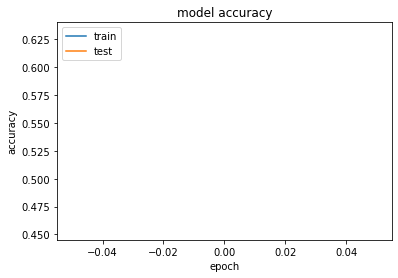

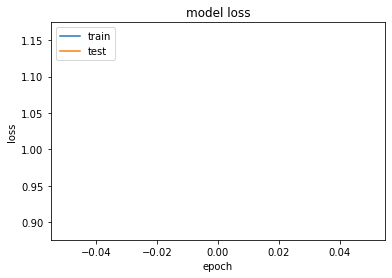

In [16]:
# dimensions of our images.
img_width, img_height = #add

# The batch size represents the total amount of pictures that are included in each iteration.
batch_size = #add

#Prepare data
#Add code
train_data, validation_data = #Add code

#Load Model
model=# Add code

# Defining the total amount of samples in both the training and validation set
nb_train_samples = 180
nb_validation_samples = 45
epochs = #Add

#Start the training model
#Add code


# 6. Use the trained model to classify input data



### 6.1 Setup a predict image function

In [17]:
# This function c
def predictImg(path, model):
    imagep = image.load_img(path, target_size=(197, 197))
    x = image.img_to_array(imagep)
    x = x / 255  # Insures that images are normalized, so it can be compared test on a model that also used normalized training and validation images
    #x = preprocess_input(x)
    x = np.expand_dims(x, axis=0) # flattens the image
    prediction = model.predict(x) # Extract the prediction made by the model
    print(path)
    print(prediction)
    findLabel(prediction, 0.2, path)


In [18]:
def findLabel(test, threshold, path):
    if (max(test[0]) < threshold):
        print("no class could be defined for " + path + " with threshold 0.85")
    else:
        m = max(test[0])
        index = [i for i, j in enumerate(list(test[0])) if j == m]
        labeler(index[0], path)


In [19]:
def labeler(inp, pathname):
    label = list(classes.keys())[inp]
    print("The image '" + pathname + "' belongs to class: " + label) # Prints the prediction
    return 0

### 6.2 Predict the unknow image
> Setup the CNN Model

> Load the trained weight(.h5) into the CNN model

> Process the unknow input image and pass into the input of the CNN model

> From the output probability(highest probability) find the label(class)

```
img_width, img_height = 197, 197
np.set_printoptions(suppress=True, precision=3)

model = compileModel(img_width, img_height)

model.load_weights(data_dir_path+'custom_w_supervision_try2_best.h5')

# predictImg(prediction_data_dir + '/ambulance1.jpg, model) #ambulance
predictImg(prediction_data_dir + '/toyota1.jpg', model) # 
predictImg(prediction_data_dir + '/toyota2.jpg', model) # 


predictImg(prediction_data_dir + '/honda1.jpg', model) # 
predictImg(prediction_data_dir + '/honda2.jpg', model) # 

predictImg(prediction_data_dir + '/volkwagen1.jpg', model) # 
predictImg(prediction_data_dir + '/volkwagen2.jpg', model) # 

# predictImg(prediction_data_dir + '/ambulance1.jpg, model) #
predictImg(prediction_data_dir + '/toyota3.jpg', model) # 
predictImg(prediction_data_dir + '/toyota4.jpg', model) # 


predictImg(prediction_data_dir + '/honda3.jpg', model) # 
predictImg(prediction_data_dir + '/honda4.jpg', model) # 

predictImg(prediction_data_dir + '/volkwagen3.jpg', model) # 
predictImg(prediction_data_dir + '/volkwagen4.jpg', model) # 
```

In [25]:
img_width, img_height = 197, 197
np.set_printoptions(suppress=True, precision=3)

#Setup CNN Model
#Add code 

#Load weight into Model 
#Add code



# predictImg(prediction_data_dir + '/ambulance1.jpg, model) #ambulance
predictImg(prediction_data_dir + '/toyota1.jpg', model) # 
predictImg(prediction_data_dir + '/toyota2.jpg', model) # 


predictImg(prediction_data_dir + '/honda1.jpg', model) # 
predictImg(prediction_data_dir + '/honda2.jpg', model) # 

predictImg(prediction_data_dir + '/volkwagen1.jpg', model) # 
predictImg(prediction_data_dir + '/volkwagen2.jpg', model) # 

# predictImg(prediction_data_dir + '/ambulance1.jpg, model) #
predictImg(prediction_data_dir + '/toyota3.jpg', model) # 
predictImg(prediction_data_dir + '/toyota4.jpg', model) # 


predictImg(prediction_data_dir + '/honda3.jpg', model) # 
predictImg(prediction_data_dir + '/honda4.jpg', model) # 

predictImg(prediction_data_dir + '/volkwagen3.jpg', model) # 
predictImg(prediction_data_dir + '/volkwagen4.jpg', model) # 


compiling model
./Lab1dataset/prediction_images//toyota1.jpg
[[0.    0.976 0.023]]
The image './Lab1dataset/prediction_images//toyota1.jpg' belongs to class: Toyota
./Lab1dataset/prediction_images//toyota2.jpg
[[0. 1. 0.]]
The image './Lab1dataset/prediction_images//toyota2.jpg' belongs to class: Toyota
./Lab1dataset/prediction_images//honda1.jpg
[[0.869 0.071 0.06 ]]
The image './Lab1dataset/prediction_images//honda1.jpg' belongs to class: Honda
./Lab1dataset/prediction_images//honda2.jpg
[[0.998 0.001 0.001]]
The image './Lab1dataset/prediction_images//honda2.jpg' belongs to class: Honda
./Lab1dataset/prediction_images//volkwagen1.jpg
[[0.001 0.    0.998]]
The image './Lab1dataset/prediction_images//volkwagen1.jpg' belongs to class: Volkswagen
./Lab1dataset/prediction_images//volkwagen2.jpg
[[0. 0. 1.]]
The image './Lab1dataset/prediction_images//volkwagen2.jpg' belongs to class: Volkswagen
./Lab1dataset/prediction_images//toyota3.jpg
[[0. 1. 0.]]
The image './Lab1dataset/prediction_